## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers
####   - Multiple Regression (trial)

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\fardi\OneDrive\Desktop\CF\Data Immersion\A6.Advanced Analytics & Dashboard Design\05-12-2021 Germany Apartment Rental"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'geo_bln', 'cellar',
       'baseRent', 'livingSpace', 'geo_krs', 'condition', 'interiorQual',
       'petsAllowed', 'street', 'lift', 'typeOfFlat', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'regio3', 'date'],
      dtype='object')

In [6]:
#### Drop column 'Unnamed: 0'
df = df.drop(['Unnamed: 0' ], axis=1)

In [7]:
df.head(20)

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,baseRent,...,petsAllowed,street,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,regio3,date
0,245.00,central_heating,False,False,840.00,1965.0,False,Nordrhein_Westfalen,True,595.00,...,no,Sch&uuml;ruferstra&szlig;e,False,ground_floor,4.0,1.0,3.000000,True,SchÃ¼ren,43586
1,255.00,floor_heating,True,True,1300.00,2019.0,False,Sachsen,True,965.00,...,no,Turnerweg,True,apartment,3.0,3.0,4.000000,False,ÃuÃere_Neustadt_Antonstadt,43739
2,138.00,self_contained_central_heating,False,True,903.00,1950.0,False,Bremen,False,765.00,...,no,Hermann-Henrich-Meier-Allee,False,apartment,3.0,1.0,3.670219,False,Neu_Schwachhausen,43862
3,110.00,oil_heating,False,False,690.00,1970.0,True,Baden_WÃ¼rttemberg,True,580.00,...,no,no_information,False,roof_storey,2.0,2.0,2.000000,False,Denzlingen,43862
4,88.00,central_heating,False,True,307.00,1930.0,False,Sachsen,True,219.00,...,no,Hofer Stra&szlig;e,False,apartment,2.0,3.0,3.670219,False,Sonnenberg,43739
5,200.00,central_heating,False,False,1150.00,1951.0,False,Nordrhein_Westfalen,False,950.00,...,no,no_information,False,apartment,4.0,4.0,4.000000,False,Mitte,43739
6,215.00,gas_heating,True,True,1320.65,2018.0,False,Nordrhein_Westfalen,True,972.60,...,negotiable,Am Dimberg,True,ground_floor,3.0,0.0,4.000000,False,KirchhÃ¶rde,43586
7,80.00,district_heating,False,True,300.00,1990.0,False,ThÃ¼ringen,True,220.00,...,no,Birkenhof,False,apartment,1.0,4.0,5.000000,False,SchÃ¶ndorf,43344
8,290.00,district_heating,False,True,1878.48,2013.0,False,Niedersachsen,True,1343.48,...,negotiable,Robert-Gernhardt-Platz,True,apartment,5.0,1.0,4.000000,False,GÃ¶ttingen,43739
9,140.00,central_heating,False,True,1450.00,1978.0,False,Schleswig_Holstein,True,1150.00,...,negotiable,no_information,False,ground_floor,4.0,0.0,2.000000,True,Wittorf,43739


In [8]:
df.shape

(144591, 24)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
geo_bln            0
cellar             0
baseRent           0
livingSpace        0
geo_krs            0
condition          0
interiorQual       0
petsAllowed        0
street             0
lift               0
typeOfFlat         0
noRooms            0
floor              0
numberOfFloors     0
garden             0
regio3             0
date               0
dtype: int64

##### Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(144591,)

##### Extreme values checks

C:\Users\fardi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalRent', ylabel='Density'>

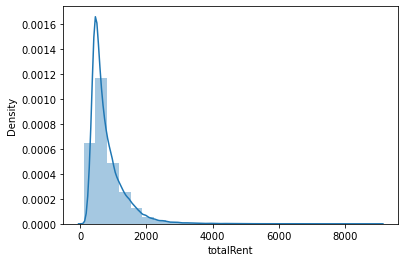

In [12]:
sns.distplot(df['totalRent'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [13]:
df['totalRent'].mean() # Check the mean

813.018283364806

In [14]:
df['totalRent'].median() # Check the median

641.87

In [15]:
df['totalRent'].max() # Check the max

9000.0

### 3. Data prep for regression analysis 

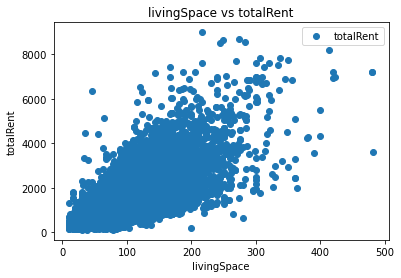

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('livingSpace vs totalRent')  
plt.xlabel('livingSpace')  
plt.ylabel('totalRent')  
plt.show()

### Hypothesis
##### The larger the livingSpace, the higher the totalRent

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['livingSpace'].values.reshape(-1,1)
y = df['totalRent'].values.reshape(-1,1)

In [18]:
X

array([[ 86.  ],
       [ 83.8 ],
       [ 84.97],
       ...,
       [ 55.  ],
       [115.  ],
       [ 95.  ]])

In [19]:
y

array([[ 840.],
       [1300.],
       [ 903.],
       ...,
       [ 368.],
       [1150.],
       [ 930.]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

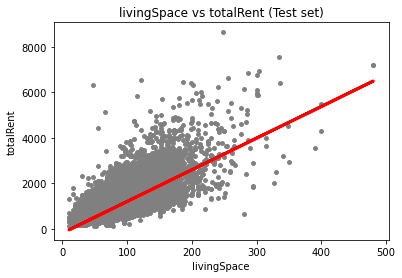

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('livingSpace vs totalRent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.94271835]]
Mean squared error:  126285.97969012643
R2 score:  0.5772612432992944


- The slope coefficient is 13.94
- MSE is quite high at 126286
- R2 of 0.57, means that livingSpace does have a slight ability to predict totalRent, but the model is not that accurate

In [27]:
y_predicted

array([[ 321.24135039],
       [ 572.21028072],
       [1088.09085974],
       ...,
       [ 781.351056  ],
       [ 781.351056  ],
       [ 841.16531773]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,550.00,321.241350
1,1050.00,572.210281
2,1030.00,1088.090860
3,2950.00,4685.312195
4,310.00,321.241350
5,528.00,689.468542
6,373.53,649.452940
7,240.00,474.611252
8,467.00,686.261717
9,553.00,646.246115


###### -  Here we can see that their is a quite large difference between the actual values and predicted values

##### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.94271835]]
Mean squared error:  125896.81080477133
R2 score:  0.5754157144198988


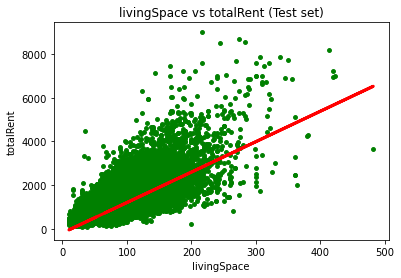

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('livingSpace vs totalRent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

- The RMSE and R2 scores are almost identical, this prove that our model is not overfitted
- it just does not have a strong relationship, using livingSpace alone, we can't predict totalRent

### Bonus: performance improvement after removing outliers

In [33]:
# Clean the extreme values from the "totalRent" variable observed during the consistency checks.

df_test = df[df['totalRent'] <=4000] 

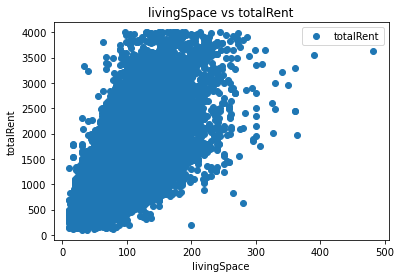

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_test.plot(x = 'livingSpace', y='totalRent',style='o') 
plt.title('livingSpace vs totalRent')  
plt.xlabel('livingSpace')  
plt.ylabel('totalRent')  
plt.show()

In [37]:
# Reshape again.

X_2 = df_test['livingSpace'].values.reshape(-1,1)
y_2 = df_test['totalRent'].values.reshape(-1,1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [40]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [41]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.92005491]]
Mean squared error:  106384.18881671898
R2 score:  0.5663297918468152


##### -  Removing the outlier, does not improvr the model, 
##### - it had the adverse effect, the R2 reduce slightly

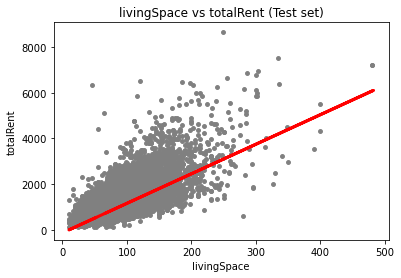

In [43]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('livingSpace vs totalRent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

##### - Removing the outliers does not improve the model, it shows that these extreme values are important and are not outliers
##### - With an R2 of 0.57, we can say that livingSpace does have an influence on totalRent, 
##### - But the relationship is not strong enough to be a able to predict totalRent accurately, maybe with the addition of other variables

#### Data bias
- These data were scraped from a website as such, the totalRent normally are a range of numbers e.g rent from 800 to 1000 and there are also additional charges if you take parking services or heating cost and internet etc Here there are no information how the totalRent were calculated. And some of the advert on the Immoscout24 website, the totalRent are negotiable, while scraping only the price advertised were taken not the real price. These biases might have distort the ability for the model accuracy. 

Lastly, I would like to add that here a multi regression model will work better as there are many factors that influence the totalRent. The quality of the apartment, if it has lift, garden, kitchen etc

## Multiple Regression trial

In [ ]:
#converting categorical values
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object':
        columns.append(cols)
        
columns

In [47]:
df_sub = ['heatingType',
 'geo_bln',
 'condition',
 'interiorQual',
 'petsAllowed',
 'typeOfFlat']

In [48]:
# converting categorical 
dummies_feature = pd.get_dummies(df[df_sub])
dummies_feature.head()

,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
data = pd.concat([df, dummies_feature], axis=1)
data.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,baseRent,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,245.0,central_heating,False,False,840.0,1965.0,False,Nordrhein_Westfalen,True,595.0,...,0,1,0,0,0,0,0,0,0,0
1,255.0,floor_heating,True,True,1300.0,2019.0,False,Sachsen,True,965.0,...,1,0,0,0,0,0,0,0,0,0
2,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,Bremen,False,765.0,...,1,0,0,0,0,0,0,0,0,0
3,110.0,oil_heating,False,False,690.0,1970.0,True,Baden_WÃ¼rttemberg,True,580.0,...,0,0,0,0,0,0,0,0,1,0
4,88.0,central_heating,False,True,307.0,1930.0,False,Sachsen,True,219.0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
data.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'geo_bln', 'cellar', 'baseRent',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors',
       'garden', 'regio3', 'date', 'heatingType_central_heating',
       'heatingType_combined_heat_and_power_plant',
       'heatingType_district_heating', 'heatingType_electric_heating',
       'heatingType_floor_heating', 'heatingType_gas_heating',
       'heatingType_heat_pump', 'heatingType_night_storage_heater',
       'heatingType_oil_heating', 'heatingType_self_contained_central_heating',
       'heatingType_solar_heating', 'heatingType_stove_heating',
       'heatingType_wood_pellet_heating', 'geo_bln_Baden_WÃ¼rttemberg',
       'geo_bln_Bayern', 'geo_bln_Berlin', 'geo_bln_Brandenburg',
       'geo_bln_Bremen', 'geo_bln_Hamburg', 'geo_bln_Hessen',
       'geo_bln_Mecklenburg_Vor

In [51]:
data.drop(['heatingType','condition','typeOfFlat', 'cellar', 'street', 'floor', 'petsAllowed','regio3', 'date', 'interiorQual',
          'geo_bln', 'geo_krs'],axis=1,inplace = True)

In [52]:
y = np.log(data['totalRent'])
X=data.copy()
X.drop(['totalRent'],axis=1,inplace = True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 7.93778899e-06  6.40944532e-02  5.56372251e-02 -1.75221698e-04
  4.71017641e-02  5.12894377e-04  4.30345048e-03  7.74824303e-02
  5.26056964e-02  9.84744774e-05 -3.63097594e-03  4.12464954e-02
  4.80215033e-02  2.30981526e-02 -8.80062473e-02  6.01772855e-02
  3.52255056e-02  1.88278976e-02 -1.02012772e-01  2.31885258e-02
 -1.98604425e-02  2.59156422e-02 -1.01293608e-01  3.54720620e-02
  9.78167731e-02  1.16514261e-01  1.50532440e-01 -6.48680362e-02
  4.90146618e-03  1.82262874e-01  1.19404182e-01 -1.35005229e-01
 -6.68724838e-03  1.99736261e-02  9.66384233e-03 -2.87725171e-02
 -1.58812738e-01 -1.70793944e-01  4.61673282e-02 -1.82297081e-01
 -8.74330317e-03  4.74964946e-02  3.48505210e-02 -6.45065958e-03
  3.35938303e-02 -7.81124714e-03 -3.79399432e-02 -5.96462593e-02
 -1.19283391e-02  3.06606644e-02 -1.40817590e-02  2.31500781e-02
  1.43849270e-03 -1.48765893e-02 -7.29687847e-02  6.32568032e-02
 -6.34454777e-04  8.77007568e-03 -8.13562090e-03  8.55075736e-04
 -6.05689019e-03 -

#### - I am not sure if this is the right way of doing a multiple regresion, but if they are correct, then we achived an R2 score of 0.896
#### - This shows that there are many several variables that affects the totalRent amount
#### - Inreality, there are several factors that determines the total amount for renting an apartment